In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
import os
from PIL import Image

import tensorflow as tf

with tf.device('/gpu:1'):
    config = tf.compat.v1.ConfigProto()
    config.gpu_options.allow_growth = True
    tf.compat.v1.keras.backend.set_session(tf.compat.v1.Session(config=config))


# Keras Libraries
import keras
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.preprocessing.image import ImageDataGenerator, load_img
from sklearn.metrics import classification_report, confusion_matrix
%matplotlib inline

Using TensorFlow backend.


# Load Data

In [2]:
train_folder= './common/data/chest_xray/train/'
val_folder = './common/data/chest_xray/val/'
test_folder = './common/data/chest_xray/test/'

Set up Training Folders

In [3]:
# train 
os.listdir(train_folder)
train_n = train_folder+'NORMAL/'
train_p = train_folder+'PNEUMONIA/'

Set up Testing Folders

In [4]:
# test
os.listdir(test_folder)
train_n = test_folder+'NORMAL/'
train_p = test_folder+'PNEUMONIA/'

234
normal picture title:  NORMAL2-IM-0322-0001.jpeg
pneumonia picture title: person1623_virus_2813.jpeg


Text(0.5, 1.0, 'Pneumonia')

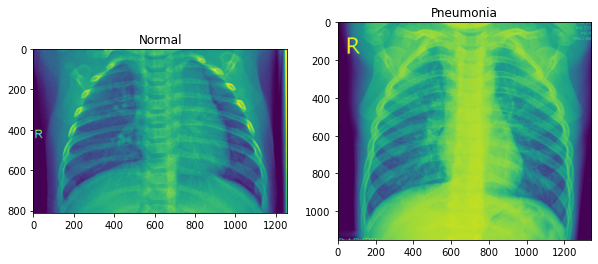

In [5]:
#Normal pic 
print(len(os.listdir(train_n)))
rand_norm= np.random.randint(0,len(os.listdir(train_n)))
norm_pic = os.listdir(train_n)[rand_norm]
print('normal picture title: ',norm_pic)

norm_pic_address = train_n+norm_pic

#Pneumonia
rand_p = np.random.randint(0,len(os.listdir(train_p)))

sic_pic =  os.listdir(train_p)[rand_norm]
sic_address = train_p+sic_pic
print('pneumonia picture title:', sic_pic)

# Load images
norm_load = Image.open(norm_pic_address)
sic_load = Image.open(sic_address)

# plot images
f = plt.figure(figsize= (10,6))
a1 = f.add_subplot(1,2,1)
img_plot = plt.imshow(norm_load)
a1.set_title('Normal')

a2 = f.add_subplot(1, 2, 2)
img_plot = plt.imshow(sic_load)
a2.set_title('Pneumonia')

# Generate Dataset from image data

In [6]:
from common.src import util

train_datagen = util.create_train_datagen()
test_datagen = util.create_test_datagen()

training_set = util.create_generator_set(train_datagen, './common/data/chest_xray/train/')
validation_generator = util.create_generator_set(test_datagen, './common/data/chest_xray/val/')
test_set = util.create_generator_set(test_datagen, './common/data/chest_xray/test/', batch_size = 1, shuffle = False)

Found 5216 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


# Create/Load Model

In [8]:
from common.src import models

cnn = models.CNNModel()
cnn.create_model()
cnn.summary()

# Fit Model

In [9]:
cnn_model = cnn.fit_generator(training_set, validation_generator, epochs = 200)

Epoch 1/200
163/163 [==============================] - 84s 514ms/step - loss: 0.3979 - tp: 4322.0000 - fp: 976.0000 - tn: 4240.0000 - fn: 894.0000 - accuracy: 0.8207 - precision: 0.8158 - recall: 0.8286 - auc: 0.8994 - val_loss: 0.5024 - val_tp: 285.0000 - val_fp: 19.0000 - val_tn: 285.0000 - val_fn: 19.0000 - val_accuracy: 0.9375 - val_precision: 0.9375 - val_recall: 0.9375 - val_auc: 0.8867
Epoch 2/200
163/163 [==============================] - 80s 493ms/step - loss: 0.2884 - tp: 4599.0000 - fp: 638.0000 - tn: 4578.0000 - fn: 617.0000 - accuracy: 0.8797 - precision: 0.8782 - recall: 0.8817 - auc: 0.9492 - val_loss: 0.4144 - val_tp: 247.0000 - val_fp: 57.0000 - val_tn: 247.0000 - val_fn: 57.0000 - val_accuracy: 0.8125 - val_precision: 0.8125 - val_recall: 0.8125 - val_auc: 0.9648
Epoch 3/200
163/163 [==============================] - 83s 510ms/step - loss: 0.2569 - tp: 4637.0000 - fp: 570.0000 - tn: 4646.0000 - fn: 579.0000 - accuracy: 0.8899 - precision: 0.8905 - recall: 0.8890 - auc

Epoch 22/200
163/163 [==============================] - 300s 2s/step - loss: 0.1429 - tp: 4926.0000 - fp: 281.0000 - tn: 4935.0000 - fn: 290.0000 - accuracy: 0.9453 - precision: 0.9460 - recall: 0.9444 - auc: 0.9870 - val_loss: 0.3948 - val_tp: 247.0000 - val_fp: 57.0000 - val_tn: 247.0000 - val_fn: 57.0000 - val_accuracy: 0.8125 - val_precision: 0.8125 - val_recall: 0.8125 - val_auc: 0.8516
Epoch 23/200
163/163 [==============================] - 87s 537ms/step - loss: 0.1375 - tp: 4940.0000 - fp: 277.0000 - tn: 4939.0000 - fn: 276.0000 - accuracy: 0.9470 - precision: 0.9469 - recall: 0.9471 - auc: 0.9881 - val_loss: 0.4590 - val_tp: 209.0000 - val_fp: 95.0000 - val_tn: 209.0000 - val_fn: 95.0000 - val_accuracy: 0.6875 - val_precision: 0.6875 - val_recall: 0.6875 - val_auc: 0.8750
Epoch 24/200
163/163 [==============================] - 78s 480ms/step - loss: 0.1414 - tp: 4941.0000 - fp: 268.0000 - tn: 4948.0000 - fn: 275.0000 - accuracy: 0.9479 - precision: 0.9486 - recall: 0.9473 - au

Epoch 43/200
163/163 [==============================] - 52s 317ms/step - loss: 0.1120 - tp: 4993.0000 - fp: 232.0000 - tn: 4984.0000 - fn: 223.0000 - accuracy: 0.9564 - precision: 0.9556 - recall: 0.9572 - auc: 0.9915 - val_loss: 0.3237 - val_tp: 266.0000 - val_fp: 38.0000 - val_tn: 266.0000 - val_fn: 38.0000 - val_accuracy: 0.8750 - val_precision: 0.8750 - val_recall: 0.8750 - val_auc: 0.9258
Epoch 44/200
163/163 [==============================] - 51s 315ms/step - loss: 0.1091 - tp: 5012.0000 - fp: 207.0000 - tn: 5009.0000 - fn: 204.0000 - accuracy: 0.9606 - precision: 0.9603 - recall: 0.9609 - auc: 0.9924 - val_loss: 0.3724 - val_tp: 266.0000 - val_fp: 57.0000 - val_tn: 247.0000 - val_fn: 38.0000 - val_accuracy: 0.8438 - val_precision: 0.8235 - val_recall: 0.8750 - val_auc: 0.9180
Epoch 45/200
163/163 [==============================] - 52s 318ms/step - loss: 0.1091 - tp: 4991.0000 - fp: 222.0000 - tn: 4994.0000 - fn: 225.0000 - accuracy: 0.9572 - precision: 0.9574 - recall: 0.9569 - 

Epoch 64/200
163/163 [==============================] - 52s 321ms/step - loss: 0.0985 - tp: 5019.0000 - fp: 192.0000 - tn: 5024.0000 - fn: 197.0000 - accuracy: 0.9627 - precision: 0.9632 - recall: 0.9622 - auc: 0.9938 - val_loss: 0.5716 - val_tp: 228.0000 - val_fp: 95.0000 - val_tn: 209.0000 - val_fn: 76.0000 - val_accuracy: 0.7188 - val_precision: 0.7059 - val_recall: 0.7500 - val_auc: 0.8398
Epoch 65/200
163/163 [==============================] - 53s 322ms/step - loss: 0.1034 - tp: 5012.0000 - fp: 199.0000 - tn: 5017.0000 - fn: 204.0000 - accuracy: 0.9614 - precision: 0.9618 - recall: 0.9609 - auc: 0.9930 - val_loss: 0.2953 - val_tp: 247.0000 - val_fp: 57.0000 - val_tn: 247.0000 - val_fn: 57.0000 - val_accuracy: 0.8125 - val_precision: 0.8125 - val_recall: 0.8125 - val_auc: 0.9512
Epoch 66/200
163/163 [==============================] - 53s 325ms/step - loss: 0.1075 - tp: 4997.0000 - fp: 209.0000 - tn: 5007.0000 - fn: 219.0000 - accuracy: 0.9590 - precision: 0.9599 - recall: 0.9580 - 

Epoch 85/200
163/163 [==============================] - 52s 321ms/step - loss: 0.0976 - tp: 5023.0000 - fp: 192.0000 - tn: 5024.0000 - fn: 193.0000 - accuracy: 0.9631 - precision: 0.9632 - recall: 0.9630 - auc: 0.9935 - val_loss: 0.3989 - val_tp: 247.0000 - val_fp: 57.0000 - val_tn: 247.0000 - val_fn: 57.0000 - val_accuracy: 0.8125 - val_precision: 0.8125 - val_recall: 0.8125 - val_auc: 0.8867
Epoch 86/200
163/163 [==============================] - 52s 318ms/step - loss: 0.0895 - tp: 5032.0000 - fp: 186.0000 - tn: 5030.0000 - fn: 184.0000 - accuracy: 0.9645 - precision: 0.9644 - recall: 0.9647 - auc: 0.9949 - val_loss: 0.3365 - val_tp: 247.0000 - val_fp: 57.0000 - val_tn: 247.0000 - val_fn: 57.0000 - val_accuracy: 0.8125 - val_precision: 0.8125 - val_recall: 0.8125 - val_auc: 0.9336
Epoch 87/200
163/163 [==============================] - 53s 325ms/step - loss: 0.0977 - tp: 5020.0000 - fp: 197.0000 - tn: 5019.0000 - fn: 196.0000 - accuracy: 0.9623 - precision: 0.9622 - recall: 0.9624 - 

Epoch 106/200
163/163 [==============================] - 52s 320ms/step - loss: 0.0893 - tp: 5039.0000 - fp: 180.0000 - tn: 5036.0000 - fn: 177.0000 - accuracy: 0.9658 - precision: 0.9655 - recall: 0.9661 - auc: 0.9947 - val_loss: 0.6451 - val_tp: 209.0000 - val_fp: 95.0000 - val_tn: 209.0000 - val_fn: 95.0000 - val_accuracy: 0.6875 - val_precision: 0.6875 - val_recall: 0.6875 - val_auc: 0.8164
Epoch 107/200
163/163 [==============================] - 52s 319ms/step - loss: 0.0794 - tp: 5055.0000 - fp: 158.0000 - tn: 5058.0000 - fn: 161.0000 - accuracy: 0.9694 - precision: 0.9697 - recall: 0.9691 - auc: 0.9958 - val_loss: 0.3294 - val_tp: 228.0000 - val_fp: 76.0000 - val_tn: 228.0000 - val_fn: 76.0000 - val_accuracy: 0.7500 - val_precision: 0.7500 - val_recall: 0.7500 - val_auc: 0.9297
Epoch 108/200
163/163 [==============================] - 52s 320ms/step - loss: 0.0868 - tp: 5031.0000 - fp: 182.0000 - tn: 5034.0000 - fn: 185.0000 - accuracy: 0.9648 - precision: 0.9651 - recall: 0.9645

Epoch 127/200
163/163 [==============================] - 52s 317ms/step - loss: 0.0728 - tp: 5092.0000 - fp: 124.0000 - tn: 5092.0000 - fn: 124.0000 - accuracy: 0.9762 - precision: 0.9762 - recall: 0.9762 - auc: 0.9961 - val_loss: 0.4282 - val_tp: 209.0000 - val_fp: 95.0000 - val_tn: 209.0000 - val_fn: 95.0000 - val_accuracy: 0.6875 - val_precision: 0.6875 - val_recall: 0.6875 - val_auc: 0.8848
Epoch 128/200
163/163 [==============================] - 52s 317ms/step - loss: 0.0814 - tp: 5053.0000 - fp: 163.0000 - tn: 5053.0000 - fn: 163.0000 - accuracy: 0.9688 - precision: 0.9688 - recall: 0.9688 - auc: 0.9951 - val_loss: 0.3736 - val_tp: 247.0000 - val_fp: 57.0000 - val_tn: 247.0000 - val_fn: 57.0000 - val_accuracy: 0.8125 - val_precision: 0.8125 - val_recall: 0.8125 - val_auc: 0.9023
Epoch 129/200
163/163 [==============================] - 52s 318ms/step - loss: 0.0874 - tp: 5035.0000 - fp: 187.0000 - tn: 5029.0000 - fn: 181.0000 - accuracy: 0.9647 - precision: 0.9642 - recall: 0.9653

Epoch 148/200
163/163 [==============================] - 51s 314ms/step - loss: 0.0792 - tp: 5065.0000 - fp: 152.0000 - tn: 5064.0000 - fn: 151.0000 - accuracy: 0.9710 - precision: 0.9709 - recall: 0.9711 - auc: 0.9956 - val_loss: 0.4323 - val_tp: 228.0000 - val_fp: 76.0000 - val_tn: 228.0000 - val_fn: 76.0000 - val_accuracy: 0.7500 - val_precision: 0.7500 - val_recall: 0.7500 - val_auc: 0.8828
Epoch 149/200
163/163 [==============================] - 52s 317ms/step - loss: 0.0789 - tp: 5077.0000 - fp: 137.0000 - tn: 5079.0000 - fn: 139.0000 - accuracy: 0.9735 - precision: 0.9737 - recall: 0.9734 - auc: 0.9956 - val_loss: 0.3430 - val_tp: 247.0000 - val_fp: 57.0000 - val_tn: 247.0000 - val_fn: 57.0000 - val_accuracy: 0.8125 - val_precision: 0.8125 - val_recall: 0.8125 - val_auc: 0.9258
Epoch 150/200
163/163 [==============================] - 52s 319ms/step - loss: 0.0675 - tp: 5080.0000 - fp: 137.0000 - tn: 5079.0000 - fn: 136.0000 - accuracy: 0.9738 - precision: 0.9737 - recall: 0.9739

Epoch 169/200
163/163 [==============================] - 51s 316ms/step - loss: 0.0728 - tp: 5079.0000 - fp: 137.0000 - tn: 5079.0000 - fn: 137.0000 - accuracy: 0.9737 - precision: 0.9737 - recall: 0.9737 - auc: 0.9963 - val_loss: 0.2405 - val_tp: 285.0000 - val_fp: 19.0000 - val_tn: 285.0000 - val_fn: 19.0000 - val_accuracy: 0.9375 - val_precision: 0.9375 - val_recall: 0.9375 - val_auc: 0.9727
Epoch 170/200
163/163 [==============================] - 52s 321ms/step - loss: 0.0650 - tp: 5097.0000 - fp: 119.0000 - tn: 5097.0000 - fn: 119.0000 - accuracy: 0.9772 - precision: 0.9772 - recall: 0.9772 - auc: 0.9971 - val_loss: 0.3289 - val_tp: 247.0000 - val_fp: 57.0000 - val_tn: 247.0000 - val_fn: 57.0000 - val_accuracy: 0.8125 - val_precision: 0.8125 - val_recall: 0.8125 - val_auc: 0.9258
Epoch 171/200
163/163 [==============================] - 52s 320ms/step - loss: 0.0674 - tp: 5083.0000 - fp: 133.0000 - tn: 5083.0000 - fn: 133.0000 - accuracy: 0.9745 - precision: 0.9745 - recall: 0.9745

Epoch 190/200
163/163 [==============================] - 52s 319ms/step - loss: 0.0651 - tp: 5094.0000 - fp: 122.0000 - tn: 5094.0000 - fn: 122.0000 - accuracy: 0.9766 - precision: 0.9766 - recall: 0.9766 - auc: 0.9972 - val_loss: 0.4907 - val_tp: 209.0000 - val_fp: 95.0000 - val_tn: 209.0000 - val_fn: 95.0000 - val_accuracy: 0.6875 - val_precision: 0.6875 - val_recall: 0.6875 - val_auc: 0.8555
Epoch 191/200
163/163 [==============================] - 52s 321ms/step - loss: 0.0621 - tp: 5102.0000 - fp: 114.0000 - tn: 5102.0000 - fn: 114.0000 - accuracy: 0.9781 - precision: 0.9781 - recall: 0.9781 - auc: 0.9968 - val_loss: 0.4376 - val_tp: 228.0000 - val_fp: 76.0000 - val_tn: 228.0000 - val_fn: 76.0000 - val_accuracy: 0.7500 - val_precision: 0.7500 - val_recall: 0.7500 - val_auc: 0.8672
Epoch 192/200
163/163 [==============================] - 52s 317ms/step - loss: 0.0701 - tp: 5079.0000 - fp: 137.0000 - tn: 5079.0000 - fn: 137.0000 - accuracy: 0.9737 - precision: 0.9737 - recall: 0.9737

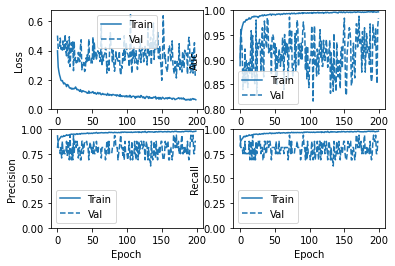

In [10]:
cnn.plot_history()

In [11]:
print(cnn.get_classification_report(test_set))

              precision    recall  f1-score   support

      NORMAL       0.96      0.80      0.87       234
   PNEUMONIA       0.89      0.98      0.93       390

    accuracy                           0.91       624
   macro avg       0.93      0.89      0.90       624
weighted avg       0.92      0.91      0.91       624

None


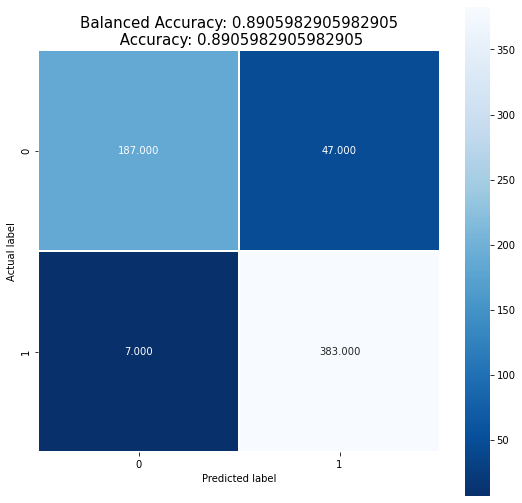

In [12]:
cnn.display_confusion_matrix(test_data_generator = test_set)